# Understanding Risk In Finance and Some Computations

## Data set

The data-set used in this analyses is from yahoo finance obtained using a python package yfinance to fetch and download the data, the tickers were grouped in their respective sectors, and used a self developed code that contains all the methods for computations for risk measures.
data for analysis is selected for a 6months observations ending January 28 2021.


In [1]:
ENERGY ='XOM CVX TOT PTR BP ENB SNP PBR EQNR COP EPD CEO TRP E KMI SLB EOG PSX MPC CNQ PXD'
BASICMATERIALS = 'BHP BBL LIN RIO VALE SHW APD ECL DD SCCO NEM GOLD DOW FCX PPG CRH NTR CTVA LYB FNV MT VMC'
COMMUNICATIONS = 'GOOG FB DIS NFLX VZ CMCSA T TMUS CHTR ABNB SE ZM BIDU NTES SNAP ATVI SPOT DASH TWLO ROKU AMOV RELX VOD AMX'
ConsumerCyclists = 'AMZN TSLA BABA HD PDD NKE TM MCD JD LOW SBUX NIO MELI BKNG TJX GM STLA HMC CVNA F PTON LULU CHWY CMG EBAY'
ConsumerDef = 'WMT PG KO PEP COST UL BUD PM DEO TGT EL BTI MDLZ MO CL DG TAL MNST KMB KDP STZ KHC SYY RLX GIS'
Finance = 'V JPM BAC MA WFC PYPL'
HealthCare = 'JNJ UNH NVS PFE LLY ABT MRK TMO ABBV NVO DHR MDT AMGN DHR BMY AZN SNY GSK CVS ISRG SYK GILD CI ANTM ZTS'
Industrial = 'HON UPS UNP BA RTX CAT MMM GE DE LMT CNI ADP CSX FDX ITW ABB NSC GPN EMR NOC WM ETN CP ROP GD'
RealEstate = 'AMT PLD BEKE CCI EQIX SPG PSA DLR CSGP SPG SBAC WELL WY BXP AVB ARE EQR O CBRE VTR'
Technology = 'AAPL MSFT TSM NVDA ADBE ASML INTC CRM CSCO AVGO QCOM ACN SAP TXN SHOP SNE AMD IBM NOW INTU AMAT UBER SQ MU'
Utilities = 'NEE DUK SO D DCUE NGG EXC AEP SRE XEL SRE ES PEG AWK WEC DTE ED EIX PCG PPL FTS ETR AEE FE'

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import ExpFinance as ef
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
yf.pdr_override()
Tickers = yf.Tickers(ENERGY+' '+BASICMATERIALS+' '+COMMUNICATIONS+' '+ConsumerCyclists+' '+ConsumerDef+' '+Finance+' '+HealthCare+' '+Industrial+' '+RealEstate+' '+Technology+' '+Utilities)
History = Tickers.history(period="1mo")
Close = History['Close']
#Convert close to a pandas dataframe
df = pd.DataFrame(data=Close)

[*********************100%***********************]  238 of 238 completed


In [39]:
# Load Logreturns Function From the Expfinance Code
Returns = ef.Logreturns(df)

In [40]:
# Clean DataFrame and Convert to Numerical Values for Arithmetic Computations
Returns = Returns.dropna()
Returns = Returns.reset_index(drop=True)

# Abstract

This article introduces the concept of financial risk discussed on a risk management perspective and its computations using a library developed using python for computation of some components of the risks. The data-set used in this analyses is from yahoo finance obtained using a python package yfinance to fetch and download the data, the tickers were grouped in their respective sectors.

## Introduction

Every movement in assets prices presents assets holders with both opportunity and risks, Investors are constantly faced with a trade-off between adjusting potential returns for higher risk. Financial crises have amplified a need for adequate risk management. The effects are poor risk management can include bankruptcy. Risk management has a long history in finance before the current used measures the most common interesting properties each development has is that they aim at addressing the downfalls the currently used measures have, thus said we have to appreaciate how far this concept has evolved. In this article we order the risks to be studied in the following order and sequence.

1. Pre Mean-Variance Risk(s)
2. Modern Portfolio Theory
3. Value at Risk and Related Measures

## Pre Mean-Variance Risk

Before the currently used modern portfolio theory(mean-variance) as part of portfolio risk management. A risk measure $p$ was considered as a function that maps the distribution of losses $G\mapsto \mathbb R$, formalising the notation you can write it as $p:G\mapsto \mathbb R$.

Using this way to model risk one need to have access to the loss datastructures or by simulation ...

## Diversification

Theres been an ongoing debate about uncertainty and risk and in statistics various distinctions have been made however in finance literature it is rarely made.
One of the important aspect of risk management has been noticeable the diversification part when forming a portfolio it has been noted and accepted by variety of authors that diversification done in a correct way can minimimize risk, it is defined as a concept that can reduce total risk without sacrificing assets greater or equal to two returns. 
Diversification is made possible by the existence of differences in risk profiles, not all assets are exposed to a same risk. for example, a new Government regulation on petrol charges
would affect the energy sector the most and perhaps a few others might generate significant revenues
or costs from petrol charges, but not every sector or company. This is what introduced the concept of clustering risk into two categories, non-Systematic Risk and Market Risk. Diversification can only reduce non-systematic risk and not market risk. 

## Markowitz Portfolio Theory

Pre the famous Modern Portfolio Theory there existed a risk philisophy considering utility factor by Bernoulli in 1738 discusses the famous St. Petersburg paradox and that risky decisions can be assessed on the basis of expected utility, a number of economists used variance as a risk measure.
Markowitz gave a formalization diversification, risk and asset selection in a framework of what is currently know as Modern Portfolio Theory. The framework only needs three variables, assets returns mean, variance and covariances.
This framework is used in portfolio optimization defined as maximizing returns in the sametime minimizing risk.

### Computations

#### Definition 1 
The expectation, sometimes called expected value or mean, of a random variable X is deﬁned as

$\mathbb E(X) = \int_{-\infty}^{\infty}xf(x)\,dx$ for a continous case.

$f(x)$ is the cumulative density function of X

and 

$\mathbb E(X) =  \sum_{k=1}^{\infty} kP(X=k)  $ in a discrete case

P(X=k) is the probability mass function X

Following standard notation we will define the expectation using the symbol $\mu = \mathbb E(X)$, and informally define it as a center value in which all values disperse. In other interpretations it is a measure of central tendency.

In [32]:
'''
Use Apples log returns to compute and plot Cumulative Density Function
'''
LogReturns = ef.Logreturns(df)
LogReturns = LogReturns['AAPL'].dropna()
LogReturns = LogReturns.reset_index(drop=True)

Text(0.5, 1.0, 'CDF for Return Distributions with df less than Max of Observed Returns')

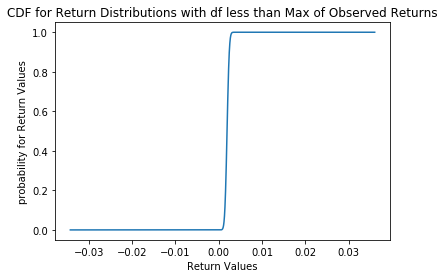

In [33]:
'''
Plot Cumulative Density Functions of Returns Probability Normalised at 0 to 1 range
'''
mu = np.mean(LogReturns)
variance = np.var(LogReturns)
A = stats.norm(mu, variance)
linvalues = np.linspace(min(LogReturns), max(LogReturns), 10000)
plt.plot(linvalues, A.cdf(linvalues))
plt.xlabel('Return Values')
plt.ylabel('probability for Return Values')
plt.title('CDF for Return Distributions with df less than Max of Observed Returns')

#### Definition 2
The variance measures the dispersement from the central point the mean, defined mathematically as

$Var(X)= \mathbb E[(X-\mathbb E(x))^2]$

Following standard notation we will define the variance using the symbol $\sigma^2 = Var(X)$, it has been noted by various of authors that the introduction of the square root above lead to variance to be an answer of squared units and thus difficult sometimes to interpret thus standard deviation which is the square root of the variance is used instead. $\sigma = \sqrt{Var(x)}$ The variance can be intepreted as the strength of dispersement from the mean, with smaller values indication it is strongly consetrated to the mean values in either direction. The greater the variance the greater the risk.

#### Definition 3
The covariance fo two random variables $X_{1}$ and $X_{2}$ can be mathematically defined as 

Cov($X_{1},X_{2}$) = $\mathbb E[(X_{1}-\mathbb E(X_{1})(X_{2}-\mathbb E(X_{2})]$

using predefined notations this can be written as Cov($X_{1},X_{2}$) = $\mathbb E[(\sigma_{x1}\sigma_{x2})]$

This measures how strong do the random variables in question vary with each other, this computation is then normalized for intepretation reasons using the correlation coefficient, the correlation coefficient yields values within the range of -1 and 1 with 1 intepreted as strong directly related directional dispersements and 0 indicating a strong non relationship and -1 as strong indirect related direction dispersements. Selecting assets with low or negative correlation factors can lead to better diversification strategy.



*Portfolio Risk*

Markowitz proposed a that portfolio risk is equal to the variance of the portfolios expected returns,
$\mu_{p}$.

For portfolio with N assets the expected returns are computed as $\mu_{p}=\sum_{i=1}^{N} w_{i}\mu_{i}$

Then the variance is given by the covariance multiply by the weights

$\sigma^2_{p} =\sum_{i=1,j=1}^{N} \sigma_{ij}w_{i}w_{j}$

This way to select portfolio and account for risk explicitly incorporate diversification using correlation between assets. Using this formulation has advantages as it brings optimization possibilities by allowing optimal portfolio selection to be a selection of portfolios that lies in an effeciency frontier.

The frontier is expresses a concave relation between expected portfolio returns and portfolio risk.

*Based on this framework a sharpe ratio was invented*

defined by $S= \frac{\mu_{p}-R_{f}}{\sigma_{p}}$

Sharpe’s ratio can be intepretted as the excess return above the risk free rate per unit of risk, the higher the ratio means the better the returns, the lesser the ratio can mean that investing on a risk free asset is less risky than the portfolio.

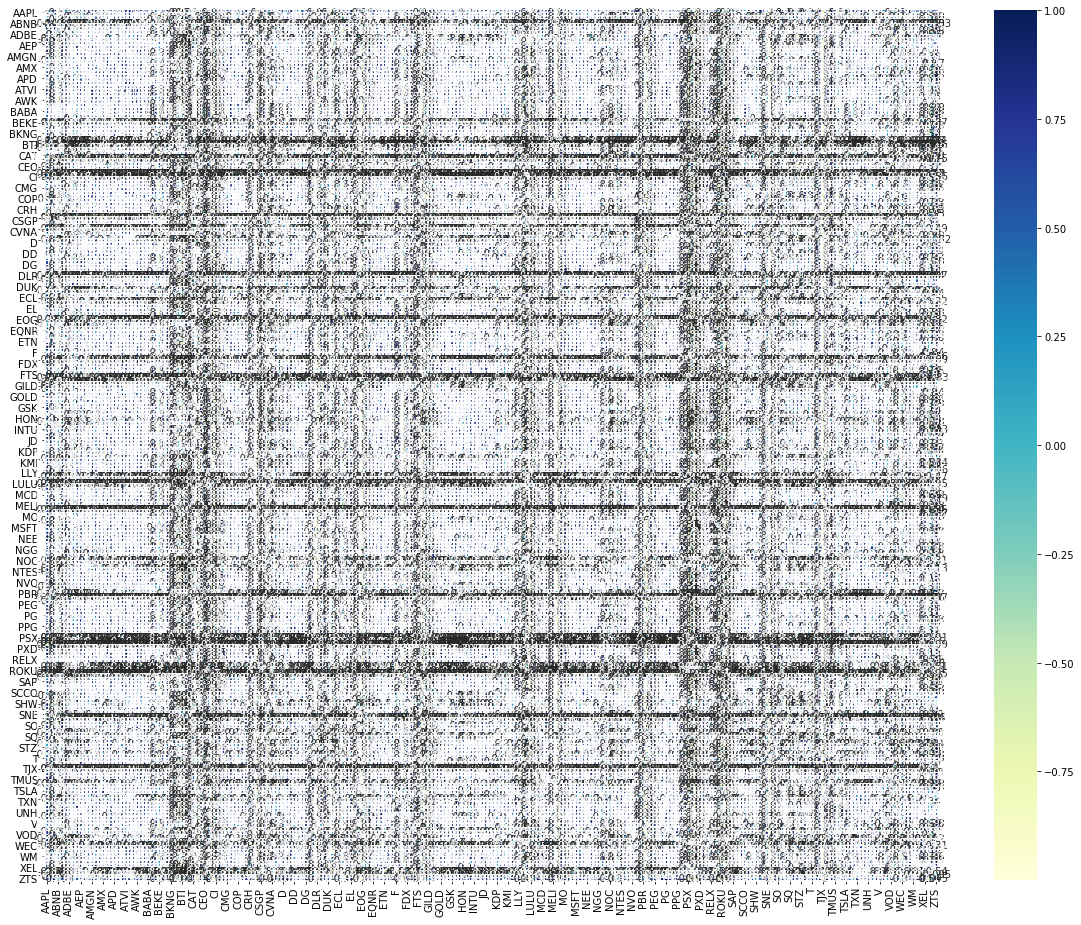

In [35]:
# Correlation Coefficients
_ReturnCorrelations = Returns.corr()
fig, ax = plt.subplots(figsize=(20,16)) 
sns.heatmap(_ReturnCorrelations, annot=True, ax=ax,cmap="YlGnBu")

Portfolio Mean: [ 5.80e-04]
[-6.32e-03]
[-2.68e-02]

[[0.9999996351583016], [0.9999996352766989], [0.9999996354119223], [0.9999996355666364], [0.9999996357439871], [0.9999996359476999], [0.9999996361822008], [0.9999996364527634], [0.9999996367656898], [0.9999996371285331], [0.9999996375503701], [0.9999996380421375], [0.999999638617045], [0.9999996392910848], [0.9999996400836577], [0.9999996410183449], [0.9999996421238565], [0.9999996434351994], [0.9999996449951118], [0.9999996468558239], [0.9999996490812185], [0.9999996517494765], [0.9999996549563129], [0.9999996588189299], [0.9999996634808361], [0.9999996456177038], [0.9999996131010028], [0.9999995741223981], [0.9999995273354703], [0.9999994711079563], [0.9999994034539805], [0.9999993219390073], [0.9999992235350399], [0.9999991043794955], [0.9999989593404172], [0.9999987811839544], [0.9999985589169526], [0.999998274415831], [0.9999978955130007], [0.9999973618460819], [0.9999965562078723], [0.9999952476692464], [0.9999929816884118], [0

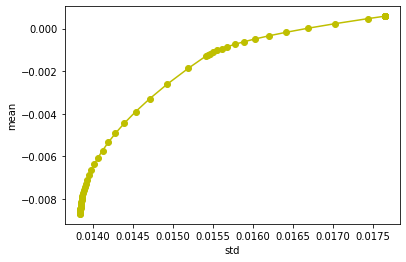

In [41]:
# Transform Returns to Numeric Values for Arithmetic Computations
Returns = Returns.to_numpy()

weights, returns, risks, portfolios = ef.OptimalPortfolio(Returns)

# Matplotlib only plot: 
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o') #risks and returns are just arrays of points along the frontier
plt.show()

## Capital Asset Pricing Model

The computation infeasibility of the MPT motivated a development of new framework that incorporated the $R_{f}$ Risk free portion from the Sharpe Ratio.

The framework has its setting as

$\mu_{i}=R_{f}+\beta_{i}(\mu_{i}-R_{f})$

The β i measures the sensitivity of the asset i’s returns to the market; a high β i
implies asset i’s returns increase with the market. In the CAPM model the term
(μ m − R f ) is the market risk premium, which is the return awarded above the risk-free
rate for investing in a risky asset. Thus CAPM theory essentially suggests investors would hold an index tracker
fund i.e S & P 500.


## Value at Risk

IF x is a random variable representing a loss, given parameter $0 <\alpha < 1$ were $\alpha$ representing the confidence level of a loss. its intepretation is the loss that will never be exceeded at a given $\alpha$ 

and is given by $Var_{\alpha}(X)= min(c:P(X<=c)>=\alpha)$

Intepretations: 

• VaRα(X) is the minimum loss that will not be exceeded with probability α.

• VaRα(X) is the α-quantile of the distribution of X.

• VaRα(X) is the smallest loss in the (1 − α) × 100% wor

## Conclusion

This article/notebook is still a work-in-progress any suggestion(s) for work improvement is welcomed

feel free to [Email Me]('dsnnkosi@gmail.com')

**References**
[Conditional Value-at-Risk: Theory and Applications] by Jakob Kisiala

Work Referencing pending